___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [2]:
# CODE HERE
df = pd.read_csv('Frozen_Dessert_Production.csv', parse_dates = True, index_col='DATE')

In [3]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [4]:
#CODE HERE
df.columns = ['Production']

In [5]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

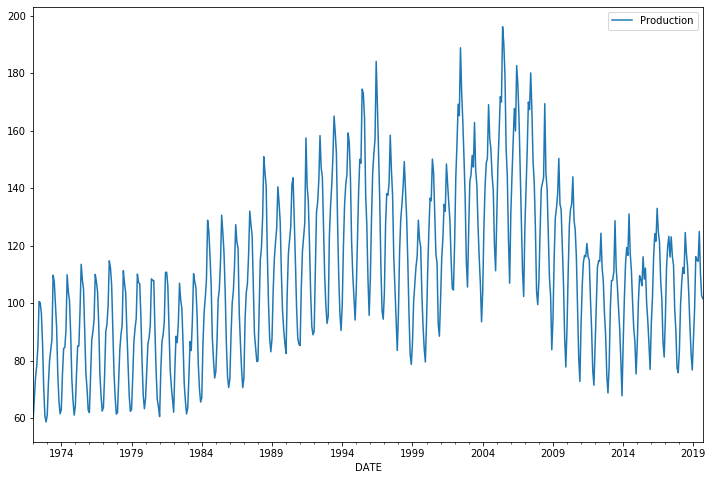

In [6]:
#CODE HERE
df.plot(figsize = (12, 8)) #as we can see bellow, in the hot months of summer, the frozen deserts are mostly sold.

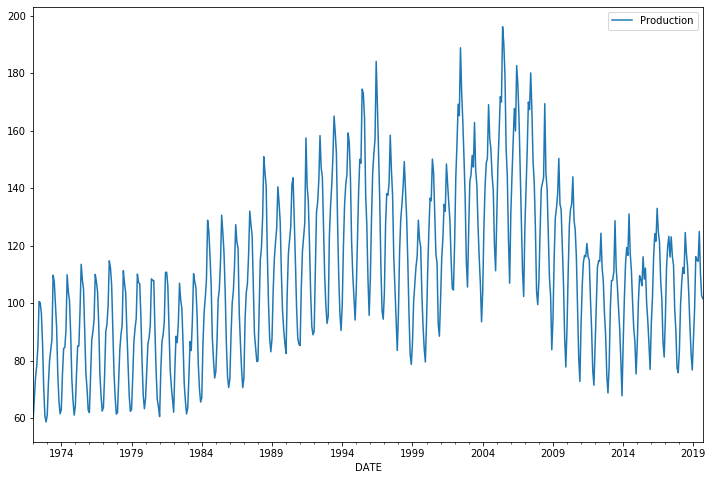

## Train Test Split

**TASK: Figure out the length of the data set**

In [7]:
#CODE HERE
len(df)

573

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [8]:
#CODE HERE
test_size = 24
test_index = len(df) - test_size

In [9]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [10]:
len(test)

24

24

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [11]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

train_scale = scaler.fit_transform(train)
test_scale = scaler.transform(test)

In [13]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [14]:
#CODE HERE
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
length = 18
n_features = 1
batch_size = 1

generator = TimeseriesGenerator(train_scale, train_scale, length = length, batch_size = batch_size) #training generator
val_generator = TimeseriesGenerator(test_scale, test_scale, length = length, batch_size = batch_size)

In [16]:
x, y = generator[0]

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [18]:
model = Sequential()


model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss ='mse')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [20]:
# CODE HERE
#this section was done in part "Time Series Generator"

**TASK: Create an EarlyStopping callback based on val_loss.**

In [21]:
#CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [23]:
# CODE HERE
model.fit_generator(generator, epochs = 20, validation_data = val_generator, callbacks = [early_stop])

Epoch 1/20
531/531 [==============================] - 41s 77ms/step - loss: 0.0291 - val_loss: 0.0064
Epoch 2/20
531/531 [==============================] - 42s 78ms/step - loss: 0.0142 - val_loss: 0.0024
Epoch 3/20
531/531 [==============================] - 40s 76ms/step - loss: 0.0073 - val_loss: 0.0015
Epoch 4/20
531/531 [==============================] - 38s 71ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 5/20
531/531 [==============================] - 39s 74ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 6/20
531/531 [==============================] - 45s 85ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 7/20
531/531 [==============================] - 40s 76ms/step - loss: 0.0036 - val_loss: 0.0017


Epoch 1/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0261 - val_loss: 0.0043
Epoch 2/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 3/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0039 - val_loss: 0.0074
Epoch 4/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 5/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 6/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 7/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0030 - val_loss: 0.0025


**TASK: Plot the history of the loss that occured during training.**

In [24]:
# CODE HERE
losses = pd.DataFrame(model.history.history)

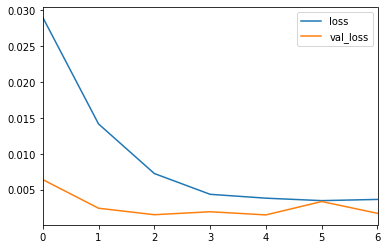

In [25]:
losses.plot()

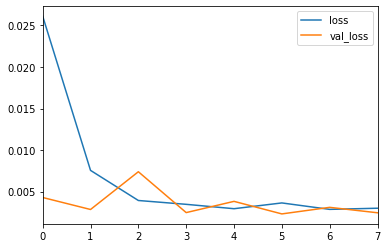

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [26]:
# CODE HERE
test_predictions = []

first_eval_batch = train_scale[-length:] # = test_scale
current_batch = first_eval_batch.reshape((batch_size, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1) #updating the current_batch

In [27]:
true_predictions = scaler.inverse_transform(test_predictions)

In [28]:
test['Predictions'] = true_predictions

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
test

,Production,Predictions
DATE,,
2017-10-01,90.4732,90.816278
2017-11-01,77.4378,83.262519
2017-12-01,75.8118,84.788580
2018-01-01,83.4343,93.859954
2018-02-01,99.4899,103.326690
2018-03-01,107.3152,110.687224
2018-04-01,112.4309,115.019114
2018-05-01,110.3544,116.648416
2018-06-01,124.5841,114.865447


C:\Users\Marcial\Anaconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Production,Predictions
DATE,,
2017-10-01,90.4732,84.348756
2017-11-01,77.4378,75.246538
2017-12-01,75.8118,75.356393
2018-01-01,83.4343,84.964974
2018-02-01,99.4899,95.405271
2018-03-01,107.3152,103.265306
2018-04-01,112.4309,109.163361
2018-05-01,110.3544,113.237268
2018-06-01,124.5841,114.119150


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

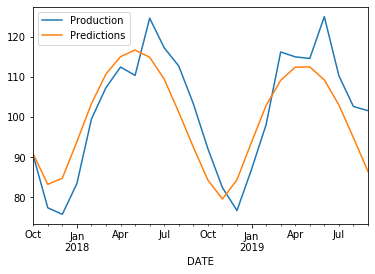

In [30]:
# CODE HERE
test.plot()

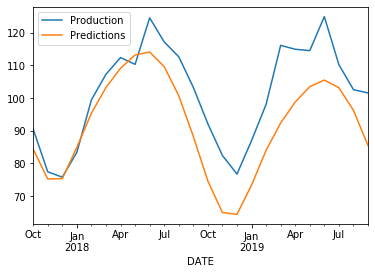

**TASK: Calculate your RMSE.**

In [31]:
#CODE HERE
from sklearn.metrics import mean_squared_error

In [32]:
MSE = mean_squared_error(y_true = test['Production'], y_pred = test['Predictions'])

In [33]:
RMSE = np.sqrt(MSE)

In [34]:
RMSE

8.021551905621953

In [35]:
#to have a more accurate prediction, we can:
#1) increse the units = 100 for LSTM in our model (but we should not increase it too much, since it may lead to overfitting)
#2) decrease test_size = 24 to test_size = 18 -> thus we have to change length = 18 to length = 12


<h1 style="font-size:20px;">Forcast the df into the future</h1>

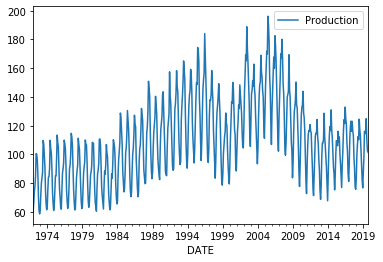

In [36]:
df.plot()

In [52]:
#scaling:
full_scaler = MinMaxScaler()
scaled_full_df = full_scaler.fit_transform(df)

In [53]:
#batches:
length_f = 18 #because we are going to forcast for the next 18 months or the next year.
n_features_f = 1
batch_size_f = 1

generator_f = TimeseriesGenerator(train_scale, train_scale, length = length_f, batch_size = batch_size_f) #training generator

In [54]:
#model:
model_f = Sequential()

model_f.add(LSTM(200, activation= 'relu', input_shape = (length_f, n_features_f)))
model_f.add(Dense(1))

model_f.compile(optimizer = 'adam', loss = 'mse')

In [55]:
model_f.fit_generator(generator_f, epochs = 4) #according to the former "losses.plot()"

Epoch 1/4
531/531 [==============================] - 50s 95ms/step - loss: 0.0308 0s - loss: 0
Epoch 2/4
531/531 [==============================] - 49s 92ms/step - loss: 0.0103
Epoch 3/4
531/531 [==============================] - 47s 88ms/step - loss: 0.0047
Epoch 4/4
531/531 [==============================] - 44s 83ms/step - loss: 0.0042


In [76]:
forcast = []
periods = 50 #anything of interest for sure, but the more the period, the more the noise in the forcasted output.

first_eval_batch_f = scaled_full_df[-length_f:]
current_batch_f = first_eval_batch_f.reshape((batch_size_f, length_f, n_features_f))

for i in range(periods):
    
    current_pred_f = model.predict(current_batch_f)[0]
    forcast.append(current_pred_f)
    current_batch_f = np.append(current_batch_f[:, 1:, :], [[current_pred_f]], axis = 1)

In [77]:
forcast = full_scaler.inverse_transform(forcast)

In [78]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [79]:
forcast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')

In [80]:
df_forcast = pd.DataFrame(data = forcast, index = forcast_index, columns = ['forcast'])

In [81]:
df_forcast

,forcast
2019-10-01,89.011625
2019-11-01,81.049522
2019-12-01,82.680451
2020-01-01,92.038499
2020-02-01,101.631955
2020-03-01,108.925905
2020-04-01,113.363792
2020-05-01,114.660764
2020-06-01,112.781806
2020-07-01,107.212344


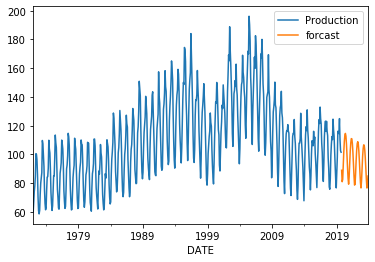

In [82]:
#see them on the same plot:

ax = df.plot()
df_forcast.plot(ax = ax)